# Import Library

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Loading

In [26]:
data = pd.read_csv('/content/movies.csv')
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Pada dataset ini merupakan dataset yang beisi judul film dan genres, yang mana memiliki total 9742 data dan 3 kolom. Berdasarkan informasi dari file Readme.md, variabel-variabel pada dataset adalah sebagai berikut:

* movieId : Mempresentasikan Id untuk setiap movie.
* Title : Mempresentasikan judul movie, yang mana diimpor dari <https://www.themoviedb.org/>, dan menyertakan tahun rilis dalam tanda kurung
* Genres : Mempresentasikan Genre yang terapat untuk setiap movies




# Exploratory Data Analysis

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [28]:
duplikat = data.duplicated().sum()
print(f"Jumlah data duplikat: {duplikat}")

Jumlah data duplikat: 0


In [29]:
print("Jumlah nilai null/kosong per kolom:")
print(data.isnull().sum())

Jumlah nilai null/kosong per kolom:
movieId    0
title      0
genres     0
dtype: int64


Pada dataset tersebut tidak memiliki data null/nan dan tidak memiliki data yang duplikat.

In [30]:
data['genre'] = data['genres'].str.split('|')
data['genre'] = data['genre'].apply(' '.join)
data['genre'].str.split(expand=True).stack().unique()

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no', 'genres', 'listed)'], dtype=object)

Memeriksa genre apa saja yang terdapat dalam dataset, yang mana diketahui bahwa terdapat data yang berisi '(no', 'genres', 'listed)'.

In [31]:
genre_none = data[data['genre'] == '(no genres listed)']
jumlah_genre_none = genre_none.shape[0]
print(f"Jumlah data dengan genre '(no genres listed)': {jumlah_genre_none}")
genre_none

Jumlah data dengan genre '(no genres listed)': 34


,movieId,title,genres,genre
8517,114335,La cravate (1957),(no genres listed),(no genres listed)
8684,122888,Ben-hur (2016),(no genres listed),(no genres listed)
8687,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),(no genres listed)
8782,129250,Superfast! (2015),(no genres listed),(no genres listed)
8836,132084,Let It Be Me (1995),(no genres listed),(no genres listed)
8902,134861,Trevor Noah: African American (2013),(no genres listed),(no genres listed)
9033,141131,Guardians (2016),(no genres listed),(no genres listed)
9053,141866,Green Room (2015),(no genres listed),(no genres listed)
9070,142456,The Brand New Testament (2015),(no genres listed),(no genres listed)
9091,143410,Hyena Road,(no genres listed),(no genres listed)


Setelah melakukan pengecekan, diketahui bahwa jumlah data dengan genre (no genres listed) berjumlah 34.

<ipython-input-32-2c1afd302d30>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')


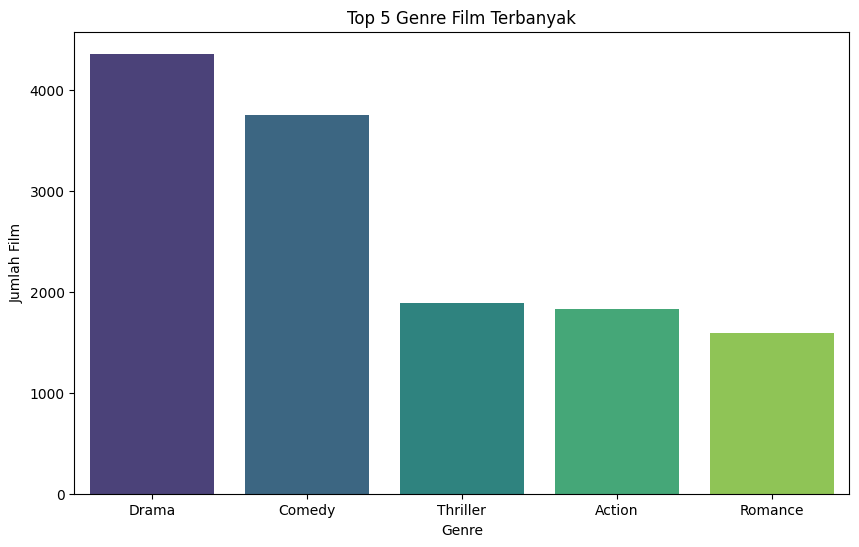

In [32]:
genre_counts = data['genres'].str.get_dummies(sep='|').sum().sort_values(ascending=False)

top_genres = genre_counts.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title('Top 5 Genre Film Terbanyak')
plt.xlabel('Genre')
plt.ylabel('Jumlah Film')
plt.show()

Melakukan pengecekan untuk stiap genre, untuk mengetahui genre apa yang paling banyak. Yang mana adalah genre drama memiliki jumlah movie terbanyak dengan total jumlah film 4000 lebih.

In [33]:
data['year'] = data['title'].str.extract(r'\((\d{4})\)')
data['year'] = data['year'].fillna(0).astype(int)
data.head()

,movieId,title,genres,genre,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,Adventure Children Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Comedy Drama Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,Comedy,1995


In [34]:
print("Jumlah nilai null/kosong pada kolom year:")
print(data[data['year'] == 0].shape[0])

data['year'].value_counts().sort_index()

Jumlah nilai null/kosong pada kolom year:
13


,count
year,
0,13
1902,1
1903,1
1908,1
1915,1
...,...
2014,278
2015,274
2016,218


Menganalisis tahun film dirilis untuk mengetahui judul film yang tidak memiliki tahun. Yang mana diketahui ada 13 judul yang tidak memiliki tahun dan memiliki rentang tahun movie dari tahun 1902 sampai 2018 yang ada pada dataset.

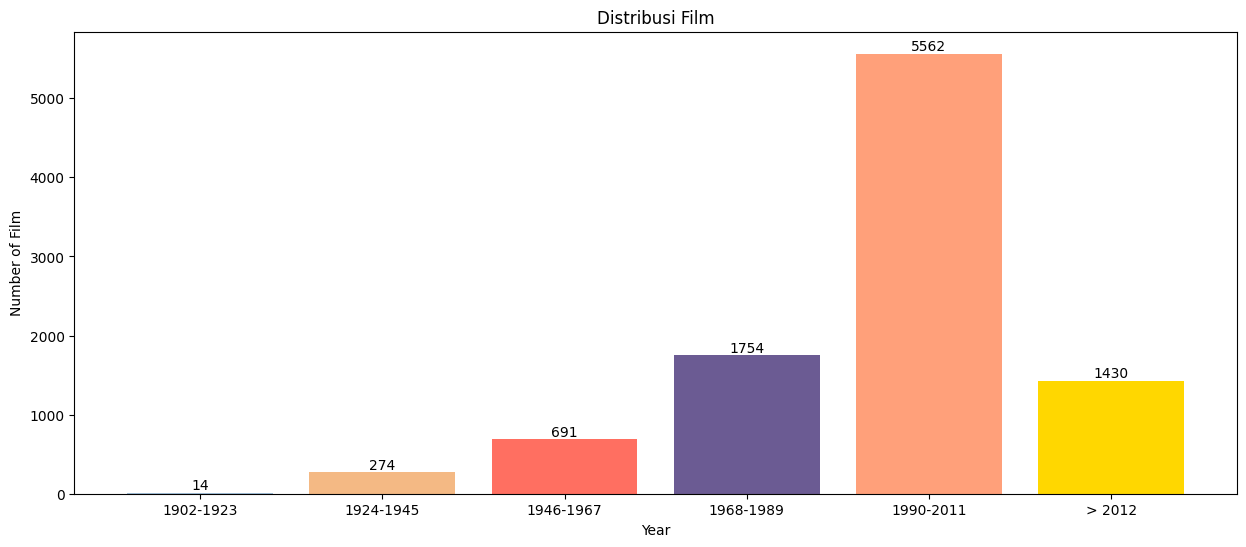

In [35]:
bin_1 = data[(data['year'] <= 1902) & (data['year'] <= 1923)]
bin_2 = data[(data['year'] >= 1924) & (data['year'] <= 1945)]
bin_3 = data[(data['year'] >= 1946) & (data['year'] <= 1967)]
bin_4 = data[(data['year'] >= 1968) & (data['year'] <= 1989)]
bin_5 = data[(data['year'] >= 1990) & (data['year'] <= 2011)]
bin_6 = data[(data['year'] >= 2012)]

x = ['1902-1923', '1924-1945', '1946-1967', '1968-1989', '1990-2011', '> 2012']
y = [bin_1.shape[0], bin_2.shape[0], bin_3.shape[0], bin_4.shape[0], bin_5.shape[0], bin_6.shape[0]]

colors = ['#A3C1DA', '#F4B984', '#FF6F61', '#6B5B93', '#FFA07A', '#FFD700']

plt.figure(figsize=(15, 6))
plt.bar(x, y, color=colors)
plt.title("Distribusi Film")
plt.xlabel("Year")
plt.ylabel("Number of Film")

for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

Melakukan binning dengan 6 kelompok binning yang mana dengan rentang 21 tahun untuk setiap kelompoknya. yang mana, diketahui rentang tahun 1990-2011  memiliki jumlah judul movie terbanyak yaitu 5562 judul movis dan rentang tahun 1902-1923 memiliki judul movie paling sedikit yaitu hanya 14 judul movies.

# Data Preparation

Hal yang pertama dilakukan adalah membuat  membuat kolom baru bernama genre yang berisi data hasil split dari kolom genres, yang mana data nya akan menjadi list. Kemudian, menggunakan apply untuk untuk mengubahnya elemen list mejadi satu string.

- data['genre'] = data['genres'].str.split('|')
- data['genre'] = data['genre'].apply(' '.join)

Membuat kolom year untuk memeriksa apakah ada semua judul film memiliki tahun. Yang mana menggunakan metode str.extract() untuk mencari pola dalam string. untuk mencari angka 4 digit yang diapit oleh tanda kurung dan Jika ada nilai yang tidak terisi (NaN)  nilai tersebut akan diganti dengan 0 serta mengubah tipe datanya menjadi int.
- data['year'] = data['title'].str.extract(r'\((\d{4})\)')
- data['year'] = data['year'].fillna(0).astype(int)

In [36]:
movies = data[(data['genre'] != '(no genres listed)') & (data['year'] != 0)]
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9704 entries, 0 to 9741
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9704 non-null   int64 
 1   title    9704 non-null   object
 2   genres   9704 non-null   object
 3   genre    9704 non-null   object
 4   year     9704 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 454.9+ KB


Pada tahap ini membuat varibel baru untuk menyimpan hasil processing. Menghapus data (no genres listed) pada kolom genre, karena model rekomendasi ini memnggunakan genre untuk rekomendasinya, pada data tersebut hanya memiliki 34 data yang mana dapat mengganggu. Kemudian, menghapus data yang nama movies nya tidak memiliki tahun yang berhumlah 13 data, menghapus data tersebut karena agar format judul sama untuk semua dataset.

In [37]:
movies = movies.drop(['movieId', 'genres', 'year'], axis=1)
movies.head()

,title,genre
0,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,Jumanji (1995),Adventure Children Fantasy
2,Grumpier Old Men (1995),Comedy Romance
3,Waiting to Exhale (1995),Comedy Drama Romance
4,Father of the Bride Part II (1995),Comedy


Menghapus kolom yang sudah tidak digunakan, yang mana kolom tersebut digunakan hanya untuk melakukan analsis. penghapusan kolom dilakukan agar membantu menyederhanakan dataset dan Menghemat Ruang Penyimpanan.

In [38]:
tf = TfidfVectorizer()

tf.fit(movies['genre'])

tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'horror', 'imax',
       'musical', 'mystery', 'noir', 'romance', 'sci', 'thriller', 'war',
       'western'], dtype=object)

Melakukan TfidfVectorizer untuk mengubah teks dari kolom genre dalam Data movies menjadi representasi numerik. Proses ini melibatkan analisis frekuensi kata untuk menentukan pentingnya setiap kata.

In [39]:
tfidf_matrix = tf.fit_transform(movies['genre'])
tfidf_matrix.shape

(9704, 21)

Melakukan fit_transform untuk melatih TfidfVectorizer pada kolom genre dari Data movies dan menghasilkan matriks TF-IDF. Matriks ini menyimpan representasi numerik dari teks dengan menghitung pentingnya setiap kata. Kemudian memeriksa dimensi matriks tersebut, yang menunjukkan jumlah dokumen dan kata unik yang ada.

In [40]:
tfidf_matrix.todense()

matrix([[0.        , 0.41679863, 0.51629501, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.51228518, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.57852088, 0.        , 0.81566758, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [41]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=movies.title
)

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,fi,...,horror,imax,musical,mystery,noir,romance,sci,thriller,war,western
title,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),0.000000,0.416799,0.516295,0.504902,0.267364,0.0,0.0,0.000000,0.483021,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Jumanji (1995),0.000000,0.512285,0.000000,0.620572,0.000000,0.0,0.0,0.000000,0.593678,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Grumpier Old Men (1995),0.000000,0.000000,0.000000,0.000000,0.570680,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.821172,0.0,0.0,0.0,0.0
Waiting to Exhale (1995),0.000000,0.000000,0.000000,0.000000,0.504843,0.0,0.0,0.466287,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.726436,0.0,0.0,0.0,0.0
Father of the Bride Part II (1995),0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Black Butler: Book of the Atlantic (2017),0.435985,0.000000,0.614704,0.000000,0.318325,0.0,0.0,0.000000,0.575087,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
No Game No Life: Zero (2017),0.000000,0.000000,0.683039,0.000000,0.353713,0.0,0.0,0.000000,0.639018,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Flint (2017),0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


Membuat matriks TF-IDF menjadi DataFrame, dengan menggunakan format dense untuk menyimpan semua nilai. Nama kolom diambil dari kata-kata unik yang diekstrak, sedangkan indeks baris menggunakan judul film dari DataFrame movies.

# Model Development

In [42]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.81360665, 0.15257959, ..., 0.        , 0.4211251 ,
        0.26736432],
       [0.81360665, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15257959, 0.        , 1.        , ..., 0.        , 0.        ,
        0.57068044],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.4211251 , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.26736432, 0.        , 0.57068044, ..., 0.        , 0.        ,
        1.        ]])

Menghitung matriks kesamaan kosinus, Matriks ini menunjukkan sejauh mana setiap judul film mirip satu sama lain berdasarkan representasi TF-IDF, dengan nilai 1 menunjukkan kesamaan sempurna dan 0 menunjukkan tidak ada kesamaan.


In [43]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=movies['title'], columns=movies['title'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (9704, 9704)


title,"Gold Rush, The (1925)",Transporter 3 (2008),Running on Empty (1988),Titanic (1953),Scorpio (1973)
title,,,,,
Brassed Off (1996),0.660936,0.000000,0.466287,0.260707,0.201770
Long Day's Journey Into Night (1962),0.000000,0.000000,1.000000,0.559113,0.432717
"Upside of Anger, The (2005)",0.660936,0.000000,0.466287,0.260707,0.201770
Body Snatchers (1993),0.000000,0.192706,0.000000,0.000000,0.265486
Gentlemen Broncos (2009),0.426372,0.000000,0.000000,0.000000,0.000000
"U.S. vs. John Lennon, The (2006)",0.000000,0.000000,0.000000,0.000000,0.000000
10 Cent Pistol (2015),0.000000,0.708538,0.000000,0.000000,0.410830
50/50 (2011),0.313214,0.000000,0.678499,0.379357,0.293598
"Medallion, The (2003)",0.144940,0.507477,0.000000,0.386013,0.298749


In [44]:
def movies_recommendations(title, similarity_data=cosine_sim_df, items=movies[['title', 'genre']], k=10):
    index = similarity_data.loc[:,title].to_numpy().argpartition(range(-1, -k, -1))

    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    closest = closest.drop(title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Fungsi movies_recommendations dirancang untuk memberikan rekomendasi film berdasarkan kesamaan dengan film tertentu yang ditentukan oleh parameter title atau judul movie. Fungsi ini menggunakan cosine_sim_df untuk menemukan movie yang paling mirip, mengambil indeks movie terdekat dengan efisiensi menggunakan argpartition, dan menghapus judul movie yang sama dari daftar rekomendasi. Selanjutnya, menggabungkan hasil dengan DataFrame yang berisi judul dan genre movie, mengembalikan DataFrame dengan maksimal k atau top 10 rekomendasi movie teratas.

In [45]:
movies[movies.title.eq('Grumpier Old Men (1995)')]

,title,genre
2,Grumpier Old Men (1995),Comedy Romance


Memastikan atau memeriksa pada judul Grumpier Old Men (1995) apakah genre rekomendasi akan sama atau mirip dengan genre movie yang dipilih.

In [46]:
movies_recommendations('Grumpier Old Men (1995)')

,title,genre
0,Danny Deckchair (2003),Comedy Romance
1,"Woman in Red, The (1984)",Comedy Romance
2,John Tucker Must Die (2006),Comedy Romance
3,The Girls (1961),Comedy Romance
4,Secret Admirer (1985),Comedy Romance
5,"Guy Thing, A (2003)",Comedy Romance
6,"Guru, The (2002)",Comedy Romance
7,Just Married (2003),Comedy Romance
8,His Girl Friday (1940),Comedy Romance
9,Love in the Afternoon (1957),Comedy Romance


Memanggil fungsi movies_recommendations yang akan memberikan daftar rekomendasi film yang mirip dengan Grumpier Old Men (1995). Diketahui bahwa top 10 nya menampilkan judul movie dengan genre yang sama.

# Evaluation

In [47]:
def precision_at_k(recommended, relevant, k):
    recommended_k = recommended[:k]
    relevant_set = set(relevant)
    hits = sum(1 for movie in recommended_k if movie in relevant_set)
    return hits / k

def average_precision_at_k(recommended, relevant, k):
    ap = 0.0
    relevant_count = 0
    for i in range(1, k + 1):
        if recommended[i - 1] in relevant:
            relevant_count += 1
            ap += precision_at_k(recommended, relevant, i)
    if relevant_count == 0:
        return 0.0
    return ap / min(len(relevant), k)

def evaluate_recommendations(query, recommended, relevant, k=10):
    p_at_k = precision_at_k(recommended, relevant, k)
    ap_at_k = average_precision_at_k(recommended, relevant, k)
    return p_at_k, ap_at_k

Membuat 3 fungsi, yang mana fungsi precision_at_k untuk menghitung precision@k dan fungsi average_precision_at_k untuk menghitung average precision@k. Sedangkan fungsi  evaluate_recommendations berfungsi untuk mengevaluasi hasil dari 2 fungsi sebelummnya.

In [48]:
movie = [
    "Grumpier Old Men (1995)",
    "Jumanji (1995)",
    "Father of the Bride Part II (1995)",
    "Dracula: Dead and Loving It (1995)",
    "Mars Needs Moms (2011)",
    "Toy Story (1995)",
    "Limitless (2011)",
    "Host, The (2013)",
    "In the Heart of the Sea (2015)",
    "Justice League (2017)"
]

results = []

for query in movie:
    query_genre = movies[movies['title'] == query]['genre'].iloc[0]


    relevant_movies = movies[movies['genre'] == query_genre]['title'].tolist()

    recommended = movies_recommendations(query)['title'].tolist()

    relevant = relevant_movies

    p_at_k, ap_at_k = evaluate_recommendations(query, recommended, relevant, k=10)
    results.append((query, p_at_k, ap_at_k))

print("Hasil Evaluasi:")

for query, p_at_k, ap_at_k in results:
    print(f"{query} - Precision@K: {p_at_k:.2f}, AP@K: {ap_at_k:.2f}")

Hasil Evaluasi:
Grumpier Old Men (1995) - Precision@K: 1.00, AP@K: 1.00
Jumanji (1995) - Precision@K: 1.00, AP@K: 1.00
Father of the Bride Part II (1995) - Precision@K: 1.00, AP@K: 1.00
Dracula: Dead and Loving It (1995) - Precision@K: 1.00, AP@K: 1.00
Mars Needs Moms (2011) - Precision@K: 0.00, AP@K: 0.00
Toy Story (1995) - Precision@K: 0.80, AP@K: 0.80
Limitless (2011) - Precision@K: 1.00, AP@K: 1.00
Host, The (2013) - Precision@K: 0.40, AP@K: 0.80
In the Heart of the Sea (2015) - Precision@K: 1.00, AP@K: 1.00
Justice League (2017) - Precision@K: 1.00, AP@K: 1.00


Hasil evaluasi model untuk rekomendasi menunjukkan kinerja yang bervariasi di antara film yang diuji. Seperti, Film seperti Grumpier Old Men (1995) dan Jumanji (1995) mencapai Precision@K dan Average Precision@K sebesar 1.00, menandakan semua rekomendasi relevan. Sebaliknya, Mars Needs Moms (2011) mendapatkan skor 0 di kedua metrik, menunjukkan bahwa tidak ada rekomendasi relevan yang diberikan, yang bisa mengindikasikan masalah pada data atau fitur yang digunakan. Variasi juga terlihat pada film lain, seperti Toy Story (1995) (Precision 0.80, AP 0.80) dan Host, The (2013) (Precision 0.40, AP 0.80), yang menunjukkan bahwa ada beberapa rekomendasi yang cukup relevan dan sedikit relevan.